<img style="float: right;" src="https://deep-esdl-markdown-images.s3.eu-central-1.amazonaws.com/esa_logo_crop.jpeg" width="250" height="auto">

# **[NoR webinar](https://eo4society.esa.int/2024/04/17/a-new-season-of-nor-webinars-is-launching/): xcube ecosystem at DeepESDL**

The xcube ecosystem is easily accessible through the [Deep Earth System Data Lab (DeepESDL)](https://www.earthsystemdatalab.net/). DeepESDL is an ESA-supported platform providing modular services for the implementation of processing workflows, based on Earth Observation data and models. ESA supports the usage of DeepESDL by sponsoring service subscriptions via the [Network of Resources.](https://t1p.de/dkogg) A central component of the service is [DeepESDL Hub](https://www.earthsystemdatalab.net/index.php/interact/deep-esdl-hub/), a fully tailorable JupyterHub environment that enables users to set up their science projects and collaborate efficiently within teams. Of course, open-source xcube and its [plugins](https://xcube.readthedocs.io/en/latest/plugins.html) can also be installed locally by following the instructions in the [xcube documentation](https://xcube.readthedocs.io/en/latest/).

## **Using xcube for efficient generation and publication of analysis-ready data cubes in the cloud**

<img style="float: right;" src="https://deep-esdl-markdown-images.s3.eu-central-1.amazonaws.com/logo.png" width="250" height="auto">

xcube is an open-source Python package and toolkit that has been developed to provide Earth observation (EO) data in an analysis-ready form to users. Using xcube, one can carefully convert EO data sources into self-contained data cubes, following the [CF conventions](http://cfconventions.org/cf-conventions/cf-conventions.html), that can be analized and published in the cloud. A viewing application is provided which allows the exploration of the data cubes. 

This notebook consists of two main parts:
1. [Feature highlights of xcube](#feature_highlights)
2. [Deep dive: applying xcube to a real world problem](#deep_dive)


Detailed information is given in the [xcube documentation](https://xcube.readthedocs.io/en/latest/).


<img src="https://deep-esdl-markdown-images.s3.eu-central-1.amazonaws.com/logo_bc_crop.jpeg" alt="drawing" width="40"/>  [Brockmann Consult](https://www.brockmann-consult.de/), 2024

-----------------

# **1 Feature highlights of xcube** <a name="feature_highlights"></a>

* [**1.1 xcube data stores**: for efficient data access](#datastores)
* [**1.2 xcube data processing**: to convert EO data sources into self-contained data cubes](#dataprocessing)
* [**1.1 xcube server**: set of RESTful web APIs, used to manage data cubes](#server)
* [**1.1 xcube viewer**: single-page web application to visualize and explore analysis-ready data cubes](#viewer)

-----------------------

## **1.1 xcube data stores** <a name="datastores"></a>
The [xcube data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) framework
- abstracts away the individual data sources, protocols and formats
- presents the data as [xarray.Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html) cubes consisting of a collection of N-dimensional geo-physical variables
- provides a simple and consistent Python interface
- if possible, allows to write data to a resource
- is pluggable, which allows to easily add a new data store for a new data resource

### **Available data stores**

The following data stores are available in the **xcube** package by default:
- `"file"` for the local filesystem
- `"s3"` for AWS S3 compatible object storage
- `"memory"` for mimicking an in-memory filesystem

Each of them can open `.nc`, `.zarr` and `.tif`, and other file formats.

Furthermore, multiple data store plug-ins have been developed to support several cloud-based data ecosystems:
- [xcube-sh](https://github.com/xcube-dev/xcube-sh): allows to generate data cubes from the [Sentinel Hub](https://www.sentinel-hub.com/) Cloud API;
- [xcube-smos](https://github.com/xcube-dev/xcube-smos): allows to generate data cubes from the [ESA SMOS](https://earth.esa.int/eogateway/missions/smos) Level 2 data;
- [xcube-cci](https://github.com/xcube-dev/xcube-cci): allows to generate data cubes from the data provided by the [ESA CCI Open Data Portal](https://climate.esa.int/en/data/#/dashboard);
- [xcube-cds](https://github.com/xcube-dev/xcube-cds): allows to generate data cubes from the data provided by the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/#!/home);
- [xcube-cmems](https://github.com/xcube-dev/xcube-cmems): allows to generate data cubes from the data provided by the [Copernicus Marine Service](https://marine.copernicus.eu/);
- [xcube-stac](https://github.com/xcube-dev/xcube-stac) (**under development**): allows to generate data cubes from data resources organized by a [SpatioTemporal Asset Catalog (STAC)](https://stacspec.org/en) 
-----------------

<img style="float: right;" src="https://deep-esdl-markdown-images.s3.eu-central-1.amazonaws.com/rectify.png" width="800" height="auto">

## **1.2 xcube data processing**  <a name="dataprocessing"></a>

The xcube data processing allows to carefully convert EO data sources into self-contained and self-described data cubes. It may contain the following processing steps to the data cube to extract the desired information:
* [resampling](https://xcube.readthedocs.io/en/latest/api.html#cube-resampling)
* [rectifiying](https://xcube.readthedocs.io/en/latest/api.html#xcube.core.resampling.rectify_dataset)
* [subsetting](https://xcube.readthedocs.io/en/latest/api.html#cube-subsetting) 
* [masking](https://xcube.readthedocs.io/en/latest/api.html#cube-masking)

The result will be an analysis-ready data cube following the [xcube dataset convention](https://xcube.readthedocs.io/en/latest/cubespec.html#xcube-dataset-convention), which allows a seamless interplay with [xcube server](#server) and [xcube viewer](#viewer).
<br><br><br><br>
---------------

<img style="float: right;" src="https://deep-esdl-markdown-images.s3.eu-central-1.amazonaws.com/xcube_server.png" width="800" height="auto">

## **1.3 xcube server** <a name="server"></a>
The [xcube server](https://xcube.readthedocs.io/en/latest/webapi.html) provides a set of RESTful web APIs, which are used to manage data cubes. Using the APIs, clients may
- list configured xcube datasets;
- get the datasets including their metadata, coordinate data, and metadata of all included variables;
- extract time-series from any variable given any geometry;
- extract statistics from any variable given any geometry;
- get spatial image tiles from any variable also as [OGC WMTS](https://www.ogc.org/standard/wmts/);
- browse and retrieve datasets and their metadata using the [OGC STAC API](https://stacspec.org/en);
- perform computing operations on datasets, with the results calculated on demand and presented as new, dynamically generated datasets;
- retrieve coverages backed by datasets using the [OGC API - Coverages](https://ogcapi.ogc.org/coverages/).
<br/><br/><br/><br/><br/><br/><br/><br/><br/>
-----------------

## **1.4 xcube viewer**  <a name="viewer"></a>
<img style="float: right;" src="https://deep-esdl-markdown-images.s3.eu-central-1.amazonaws.com/xcube_viewer.png" width="800" height="auto">

The [xcube viewer](https://xcube.readthedocs.io/en/latest/viewer.html) is an application to visualize and explore analysis-ready data cubes following the xcube dataset convention, which are provided by xcube server. Xcube viewer can be deployed as a stand alone web page or used interactively in Jupyter notebooks. 

### Example of the xcube viewer
- [ESDL Viewer](https://viewer.earthsystemdatalab.net/): deployment of the xcube viewer on the DeepESDL platform;

### Functionalities
The viewer
- visualizes data from the xcube datasets;
- may hold several xcube datasets which may contain multiple variables, where both can be selected via drop-down menus;
- shows the metadata of the selected dataset and variable;
- compares two variables by viewing them side by side with a sliding bar;
- visualizes dynamically generated variables, which are computed on the fly;
- shows time series for a selected point, polygon, or circular area;
- calculates a histogram including some statistics (min, max, mean, std) for a selected polygon or circular area;



-----------------

# **2. Deep dive: applying xcube to a real world problem** <a name="deep_dive"></a>

In the second part, we will use [xcube-sh](https://github.com/xcube-dev/xcube-sh) data store to acceess Sentinel-2 Level 2a data from [Sentinel Hub](https://www.sentinel-hub.com/), selecting the greater region of Hamburg for the month June 2019. Subseqeuntly, three spectral indices, namely [vegetation index, moisture index, and maximum chlorophyll index](https://gisgeography.com/sentinel-2-bands-combinations/), will be calculated. Furthermore, we use land cover classification data for the same region of interest provided by the DeepESDL platform to mask the calcuated spectral indices according to different land cover classes. Finnally, the analysis-ready data cube is visualized by the [xcube viewer](#viewer).   

To demonstrates the outlined example, this section is structured as follows:
* [2.1 Access Sentinel-2 and land cover classification data](#load_data)
* [2.2 Resample the land cover data to the grid mapping of the Sentinel-2 data](#resampling)
* [2.3 Write data cube to the AWS S3 team storage](#writing)
* [2.4 Calculate the spectral indices](#calc_indices)
* [2.5 Mask the spectral indices based on land cover classes](#masking)
* [2.6 Start xcube viewer for visualization](#xcube_viewer)


-----------------

## **2.0 Import Python packages**

In [1]:
import datetime
import os

import dask
import IPython.display
import numpy as np
import matplotlib
import shapely
import xarray as xr

import xcube
from xcube.core.gridmapping import GridMapping
from xcube.core.resampling import resample_in_space
from xcube.core.store import new_data_store
from xcube.core.maskset import MaskSet
from xcube.util.config import load_configs
from xcube.util.dask import new_cluster
from xcube.webapi.viewer import Viewer

For large tasks, users may easily instantiate a dask processing cluster extending the computational capabilities of their Jupyter Lab with a simple xcube command. The cluster reproduces the Python environment on the worker nodes and automatically creates processing graphs without explicit user interaction. By this means, workflows involving large data processing can be conveniently executed with Jupyter notebooks by user without specific engineering knowledge. The below lines show how to easily setup and start dask cluster that is then automatically used for further processing.

Note that for easily running this example locally, the cluster option is turned off. When turning on this option, one needs to have a [coiled account](https://docs.coiled.io/user_guide/index.html) and set the environement variables  `XCUBE_DASK_CLUSTER_TAGS` and `XCUBE_DASK_CLUSTER_ACCOUNT` by typing

```bash
$ export XCUBE_DASK_CLUSTER_TAGS=<dask-clusster-tags>
$ export XCUBE_DASK_CLUSTER_ACCOUNT=<dask-cluster-account>
```

where the layout of `XCUBE_DASK_CLUSTER_TAGS` is explained in the [`xcube.util.dask.new_cluster` documentation](https://xcube.readthedocs.io/en/latest/api.html#xcube.util.dask.new_cluster)

In [2]:
use_cluster = False

In [3]:
if use_cluster:
    del os.environ["JUPYTER_IMAGE"]
    cluster = xcube.util.dask.new_cluster(name="xcube-webinar", n_workers=4)
    client = dask.distributed.Client(cluster)
    client

-----------------
## **2.1 Access Sentinel-2 and land cover classification data** <a name="load_data"></a>

The region of interest is given by a bounding box defined by [min_lon, min_lat, max_lon, max_lat] = [9.7°, 53.4°, 10.2°, 53.7°]. The time range of the Senitnel-2 L2a data covers the month June of 2019. The land cover classification data has an annual time resolution. We therefore select the year 2019. 

In [4]:
bbox = [9.1, 53.1, 10.7, 54]
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

### **Load Senitnel-2 data from [Sentinel Hub](https://www.sentinel-hub.com/)**

We use the [xcube-sh](https://github.com/xcube-dev/xcube-sh) plugin, which provides a data store denoted by `"sentinelhub"`. The data cube for the desired region of interest and time range can be loaded with the following lines of code. Note that when xcube datasets are opened, only the cube’s structure and its metadata are loaded into memory. The actual data arrays of variables are loaded on-demand only, and only for chunks intersecting the desired sub-region.

To get access, the Sentinel Hub (SH) API credentials may be passed by environment variables:

```bash
$ export SH_CLIENT_ID=<your-client-id>
$ export SH_CLIENT_SECRET=<your-client-secret>
```

In [5]:
%%time
store = new_data_store("sentinelhub", num_retries=400)
ds_sentinel2 = store.open_data(
    "S2L2A",
    variable_names=["B02", "B03", "B04", "B05", "B06", "B08", "B8A", "B11", "CLD", "SCL"],
    bbox=bbox,
    spatial_res=0.0009, # spatial resolution is decreased for the example
    time_range=("2019-06-01", "2019-07-01"),
    tile_size=[1024, 1024]
)
ds_sentinel2

/home/conda/deepesdl/3d852a45ac723616737b70f11dd1ac0a9c77895b56ba468b492c4f3e7579c2cc-20240627-081530-049995-522-xcube-1.6.0/lib/python3.11/site-packages/xcube_sh/sentinelhub.py:254: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(dt, infer_datetime_format=True, utc=True)
/home/conda/deepesdl/3d852a45ac723616737b70f11dd1ac0a9c77895b56ba468b492c4f3e7579c2cc-20240627-081530-049995-522-xcube-1.6.0/lib/python3.11/site-packages/xcube_sh/sentinelhub.py:317: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  pd.to_timedelta(max_timedelta)


CPU times: user 116 ms, sys: 83.2 ms, total: 199 ms
Wall time: 806 ms


<xarray.Dataset> Size: 1GB
Dimensions:    (time: 18, lat: 1000, lon: 2048, bnds: 2)
Coordinates:
  * lat        (lat) float64 8kB 54.0 54.0 54.0 54.0 ... 53.1 53.1 53.1 53.1
  * lon        (lon) float64 16kB 9.1 9.101 9.102 9.103 ... 10.94 10.94 10.94
  * time       (time) datetime64[ns] 144B 2019-06-01T10:26:17 ... 2019-06-29T...
    time_bnds  (time, bnds) datetime64[ns] 288B dask.array<chunksize=(18, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B02        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B03        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B04        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B05        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B06        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B08        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B11        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B8A        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    CLD        (time, lat, lon) uint8 37MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 37MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2024-06-28T08:38:18.305895
    time_coverage_start:     2019-06-01T10:26:08+00:00
    time_coverage_end:       2019-06-29T10:36:24+00:00
    time_coverage_duration:  P28DT0H10M16S
    geospatial_lon_min:      9.1
    geospatial_lat_min:      53.1
    geospatial_lon_max:      10.9432
    geospatial_lat_max:      54.0
    processing_level:        L2A

We plot the result for the band B04 (red 650nm-680nm) at one time step as an example. Note that in this step the actual data is loaded.

CPU times: user 84.9 ms, sys: 16.2 ms, total: 101 ms
Wall time: 1.29 s


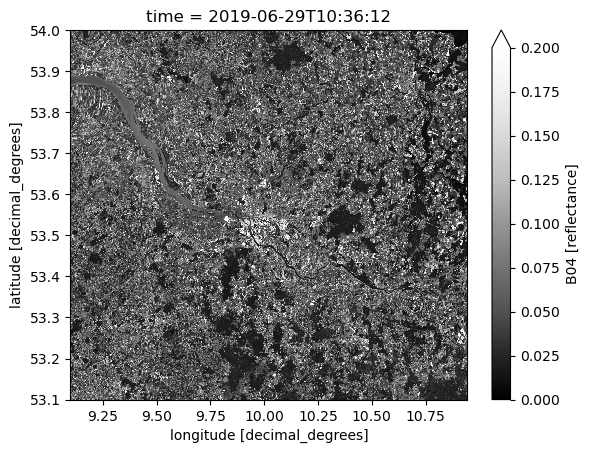

In [6]:
%%time
ds_sentinel2.B04.isel(time=-1).plot.imshow(vmin=0., vmax=0.2, cmap="Greys_r")

#### **Further features of the data store framework**

The data store framework defines a set of methods with are provided by each data store. In the following some of methods are shown which mainly help to navigate through the data store and to select the desired data cubes. 

First, we will list all data IDs available by the Sentinel Hub.

In [7]:
IPython.display.JSON(store.list_data_ids())

<IPython.core.display.JSON object>

Next, we can describe the dataset for a given data ID, which shows the metadata in a concise form. 

In [8]:
store.describe_data("S2L2A")

We can also get the parameters which are available and/or required to open a data resource.

In [9]:
store.get_open_data_params_schema("S2L2A")

### **Load CCI and C3S land cover map from DeepESDL S3**
The annual [land cover classification gridded maps](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-land-cover?tab=overview) from 2010 to 2020 derived from satellite observations are produced by the [European Space Agency (ESA) Climate Change Initiative (CCI)](https://climate.esa.int/en/about-us-new/climate-change-initiative/) and [C3S](https://climate.copernicus.eu/), which is provided to the user by the DeepESDL platform via AWS S3 object storage. To access the data, we initiate a `"s3"` data store and set the bucket name (root) to `"deep-esdl-public"`. Note that this is only accessable on the DeepESDL platform.

We open the land cover classification gridded maps, stored in the [xcube `.levels` format](https://xcube.readthedocs.io/en/latest/mldatasets.html#the-xcube-levels-format), which represents a multi-resolution datasets. These datasets comprise a fixed number of levels, each covering the same spatial area but at different spatial resolutions. Level zero corresponds to the original resolution, while each subsequent higher level decreases the spatial resolution by a factor of two consecutively. We will extract the land cover classification map at level zero, corresponding to the original spatial resolution.

In [10]:
%%time
s3_store = new_data_store("s3", root="deep-esdl-public")
land_cover_levels = s3_store.open_data("LC-1x2160x2160-1.0.0.levels")
land_cover = land_cover_levels.get_dataset(0)
land_cover

CPU times: user 150 ms, sys: 128 ms, total: 278 ms
Wall time: 4.09 s


<xarray.Dataset> Size: 1TB
Dimensions:              (time: 11, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 518kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 88B 2010-01-01 ... 2020-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (time, lat, lon) uint8 92GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    crs                  (time) int32 44B dask.array<chunksize=(11,), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 370GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lat_bounds           (time, lat, bounds) float64 11MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    lccs_class           (time, lat, lon) uint8 92GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    lon_bounds           (time, lon, bounds) float64 23MB dask.array<chunksize=(1, 2160, 2), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 185GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 370GB dask.array<chunksize=(1, 2160, 2160), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 176B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

We select the year 2019 and the region of interest defined by the bounding box above.

In [11]:
%%time
buffer = 0.5
land_cover_2019 = land_cover.sel(
    lat=slice(bbox[3] + buffer, bbox[1] - buffer), 
    lon=slice(bbox[0] - buffer, bbox[2] + buffer), 
    time= datetime.datetime(2019, 1, 1)
)
land_cover_2019

CPU times: user 7.44 ms, sys: 609 μs, total: 8.05 ms
Wall time: 7.45 ms


<xarray.Dataset> Size: 8MB
Dimensions:              (lat: 684, lon: 936, bounds: 2)
Coordinates:
  * lat                  (lat) float64 5kB 54.5 54.5 54.49 ... 52.61 52.6 52.6
  * lon                  (lon) float64 7kB 8.601 8.604 8.607 ... 11.19 11.2 11.2
    time                 datetime64[ns] 8B 2019-01-01
Dimensions without coordinates: bounds
Data variables:
    change_count         (lat, lon) uint8 640kB dask.array<chunksize=(180, 936), meta=np.ndarray>
    crs                  int32 4B dask.array<chunksize=(), meta=np.ndarray>
    current_pixel_state  (lat, lon) float32 3MB dask.array<chunksize=(180, 936), meta=np.ndarray>
    lat_bounds           (lat, bounds) float64 11kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lccs_class           (lat, lon) uint8 640kB dask.array<chunksize=(180, 936), meta=np.ndarray>
    lon_bounds           (lon, bounds) float64 15kB dask.array<chunksize=(936, 2), meta=np.ndarray>
    observation_count    (lat, lon) uint16 1MB dask.array<chunksize=(180, 936), meta=np.ndarray>
    processed_flag       (lat, lon) float32 3MB dask.array<chunksize=(180, 936), meta=np.ndarray>
    time_bounds          (bounds) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                CF-1.6
    TileSize:                   2025:2025
    cdm_data_type:              grid
    comment:                    
    contact:                    https://www.ecmwf.int/en/about/contact-us/get...
    creation_date:              20181130T095431Z
    ...                         ...
    time_coverage_end:          20101231
    time_coverage_resolution:   P1Y
    time_coverage_start:        20100101
    title:                      Land Cover Map of ESA CCI brokered by CDS
    tracking_id:                96ac9aca-1ca7-45c6-b4a5-ab448c692646
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y

We plot the land cover classification map for the selected region of interest. To decode the land cover classification identifier, we create a land cover mask using xcube's `MaskSet`, which will be used later for masking the Sentinel-2 dataset.

In [12]:
%%time
land_cover_mask = MaskSet(land_cover_2019.lccs_class)
land_cover_mask

CPU times: user 122 μs, sys: 0 ns, total: 122 μs
Wall time: 125 μs


Flag name,Mask,Value
no_data,None,0
cropland_rainfed,None,10
cropland_rainfed_herbaceous_cover,None,11
cropland_rainfed_tree_or_shrub_cover,None,12
cropland_irrigated,None,20
mosaic_cropland,None,30
mosaic_natural_vegetation,None,40
tree_broadleaved_evergreen_closed_to_open,None,50
tree_broadleaved_deciduous_closed_to_open,None,60
tree_broadleaved_deciduous_closed,None,61


CPU times: user 78.2 ms, sys: 11.3 ms, total: 89.5 ms
Wall time: 186 ms


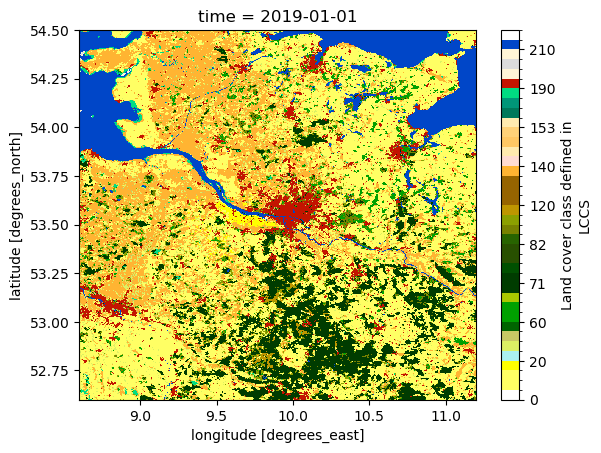

In [13]:
%%time
cmap, norm = land_cover_mask.get_cmap()
land_cover_2019.lccs_class.plot(cmap=cmap, norm=norm)

-----------------
## **2.2  Resample the land cover data to the grid mapping of the Sentinel-2 data**  <a name="resampling"></a>

We perform an upsampling of the land cover dataset to the spatial grid of the Sentinel-2 dataset by using the method `resample_in_space`.

- The land cover dataset's projection is given by WGS 84 (EPSG:4326) with a spatial resolution (`xy_res`) of 0.00277°, which is equivalent to 300m in latitude direction.
- The Senitnel-2 dataset's projection is given by WGS 84 (EPSG:4326) with a spatial resolution (`xy_res`) of 0.00018°, which is equivalent to 20m in latitude direction.

In [14]:
%%time
ds_sentinel2['lccs_class'] = resample_in_space(
    land_cover_2019,
    ref_ds=ds_sentinel2
).lccs_class
ds_sentinel2

CPU times: user 20.8 ms, sys: 228 μs, total: 21.1 ms
Wall time: 41 ms


<xarray.Dataset> Size: 1GB
Dimensions:     (time: 18, lat: 1000, lon: 2048, bnds: 2)
Coordinates:
  * lat         (lat) float64 8kB 54.0 54.0 54.0 54.0 ... 53.1 53.1 53.1 53.1
  * lon         (lon) float64 16kB 9.1 9.101 9.102 9.103 ... 10.94 10.94 10.94
  * time        (time) datetime64[ns] 144B 2019-06-01T10:26:17 ... 2019-06-29...
    time_bnds   (time, bnds) datetime64[ns] 288B dask.array<chunksize=(18, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B02         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B03         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B04         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B05         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B06         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B08         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B11         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    B8A         (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    CLD         (time, lat, lon) uint8 37MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    SCL         (time, lat, lon) uint8 37MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    lccs_class  (lat, lon) uint8 2MB dask.array<chunksize=(1000, 1024), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2024-06-28T08:38:18.305895
    time_coverage_start:     2019-06-01T10:26:08+00:00
    time_coverage_end:       2019-06-29T10:36:24+00:00
    time_coverage_duration:  P28DT0H10M16S
    geospatial_lon_min:      9.1
    geospatial_lat_min:      53.1
    geospatial_lon_max:      10.9432
    geospatial_lat_max:      54.0
    processing_level:        L2A

#### **Further details to grid mapping**

The `GridMapping` class shows a concise form of all metadata related to projection, spatial resolution, spatial extent (bbox), etc. 

In [15]:
source_gm = GridMapping.from_dataset(land_cover_2019)
source_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.002777775, 0.002777775)
* xy_bbox: (8.600000001388892, 52.60000000138889, 11.19999999861112, 54.4999999986111)
* ij_bbox: (0, 0, 936, 684)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (936, 684)
* tile_size: (936, 504)

In [16]:
target_gm = GridMapping.from_dataset(ds_sentinel2)
target_gm

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.0009, 0.0009)
* xy_bbox: (9.1, 53.1, 10.9432, 54)
* ij_bbox: (0, 0, 2048, 1000)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (2048, 1000)
* tile_size: (1024, 1000)

-----------------
## **2.3 Write data cube to the AWS S3 team storage** <a name="writing"></a>

In the next step, the selected Sentinel-2 data is written to the S3 team storage, which is initiated by DeepESDL automatically when a team is created. Hereby, we initiate a s3 data store with the given team credentials and write the data to the [xcube `.levels` format](https://xcube.readthedocs.io/en/latest/mldatasets.html#the-xcube-levels-format). The writing is done with the dask cluster using coiled. 

In [17]:
%%time
team_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    storage_options=dict(
        anon=False, key=os.environ["S3_USER_STORAGE_KEY"], secret=os.environ["S3_USER_STORAGE_SECRET"]
    ),
)

CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 3.02 ms


We the data-cube to the S3 team storage. 

In [18]:
%%time
team_store.write_data(
    ds_sentinel2,
    "s2l2a_hamburg_cube.levels",
    replace=True
)

CPU times: user 37.4 s, sys: 2.17 s, total: 39.6 s
Wall time: 1min 46s


's2l2a_hamburg_cube.levels'

-----------------
## **2.4 Calculate the spectral indices**  <a name="calc_indices"></a>

First, we open the data cube from the s3 team storage. Subsequently, We calculate the three spectral indices, namely [vegetation index, moisture index, and maximum chlorophyll index](https://gisgeography.com/sentinel-2-bands-combinations/).

In [19]:
def compute_indices(dataset):
    b04 = dataset.B04
    b05 = dataset.B05
    b06 = dataset.B06
    b08 = dataset.B08
    b8a = dataset.B8A
    b11 = dataset.B11
    scl = dataset.SCL
    cld = dataset.CLD

    # See https://gisgeography.com/sentinel-2-bands-combinations/

    # moisture_index
    #
    moisture_index = (b8a - b11) / (b8a + b11)
    moisture_index.attrs.update(
        color_value_min=0.0,
        color_value_max=0.5,
        color_bar_name="Blues",
        units="-",
        description="Simple moisture index: (B8A-B11) / (B8A+B11)",
    )
    moisture_index = moisture_index.where(cld < 75)

    # vegetation_index
    #
    vegetation_index = (b08 - b04) / (b08 + b04)
    vegetation_index.attrs.update(
        color_value_min=0.0,
        color_value_max=1.0,
        color_bar_name="Greens",
        units="-",
        description="Simple vegetation index or NDVI: (B08-B04) / (B08+B04)",
    )
    vegetation_index = vegetation_index.where(cld < 75)

    # chlorophyll_index
    #
    b_from, b_peek, b_to = b04, b05, b06
    wlen_from = b04.attrs["wavelength"]
    wlen_peek = b05.attrs["wavelength"]
    wlen_to = b06.attrs["wavelength"]
    f = (wlen_peek - wlen_from) / (wlen_to - wlen_from)
    chlorophyll_index = (b_peek - b_from) - f * (b_to - b_from)
    chlorophyll_index.attrs.update(
        color_value_min=0.0,
        color_value_max=0.025,
        color_bar_name="viridis",
        units="-",
        description="Maximum chlorophyll index: (B05-B04) - f * (B06-B04)",
    )
    chlorophyll_index = chlorophyll_index.where(scl == 6)  # where "water"

    return xr.Dataset(
        dict(
            moisture_index=moisture_index,
            vegetation_index=vegetation_index,
            chlorophyll_index=chlorophyll_index,
        )
    )

In [20]:
%%time
ds_sentinel2 = team_store.open_data("s2l2a_hamburg_cube.levels").get_dataset(0)
ds_spec_indices = compute_indices(ds_sentinel2)
ds_spec_indices

CPU times: user 49.7 ms, sys: 284 μs, total: 50 ms
Wall time: 268 ms


<xarray.Dataset> Size: 442MB
Dimensions:            (lat: 1000, lon: 2048, time: 18)
Coordinates:
  * lat                (lat) float64 8kB 54.0 54.0 54.0 54.0 ... 53.1 53.1 53.1
  * lon                (lon) float64 16kB 9.1 9.101 9.102 ... 10.94 10.94 10.94
  * time               (time) datetime64[ns] 144B 2019-06-01T10:26:17 ... 201...
Data variables:
    moisture_index     (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    vegetation_index   (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    chlorophyll_index  (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>

In the next step we filter the spectral indices according to the scene classifications given by the Sentinel-2 L2a product.

In [21]:
%%time
scene_class = MaskSet(ds_sentinel2.SCL)
scene_class

CPU times: user 136 μs, sys: 11 μs, total: 147 μs
Wall time: 151 μs


Flag name,Mask,Value
no_data,None,0
saturated_or_defective,None,1
dark_area_pixels,None,2
cloud_shadows,None,3
vegetation,None,4
bare_soils,None,5
water,None,6
clouds_low_probability_or_unclassified,None,7
clouds_medium_probability,None,8
clouds_high_probability,None,9


In [22]:
%%time
spectral_indices = [
    "moisture_index",
    "vegetation_index",
    "chlorophyll_index"
]
for spectral_index in spectral_indices:
    ds_spec_indices[spectral_index] = ds_spec_indices[spectral_index].where(
        ~scene_class.no_data &
        ~scene_class.saturated_or_defective &
        ~scene_class.clouds_low_probability_or_unclassified &
        ~scene_class.clouds_medium_probability &
        ~scene_class.clouds_high_probability &
        ~scene_class.cirrus 
    )
ds_spec_indices

CPU times: user 44.7 ms, sys: 3.95 ms, total: 48.7 ms
Wall time: 47.6 ms


<xarray.Dataset> Size: 442MB
Dimensions:            (lat: 1000, lon: 2048, time: 18)
Coordinates:
  * lat                (lat) float64 8kB 54.0 54.0 54.0 54.0 ... 53.1 53.1 53.1
  * lon                (lon) float64 16kB 9.1 9.101 9.102 ... 10.94 10.94 10.94
  * time               (time) datetime64[ns] 144B 2019-06-01T10:26:17 ... 201...
Data variables:
    moisture_index     (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    vegetation_index   (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    chlorophyll_index  (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>

-----------------
## **2.5 Mask the spectral indices based on land cover classes** <a name="masking"></a>

We use the land cover classification dataset to mask the Sentinel-2 dataset.  We create a land cover mask (`land_cover_mask`) using xcube's `MaskSet`. Next, we mask each spectral index for the selected three land cover classifications.

In [23]:
%%time
land_cover_mask = MaskSet(ds_sentinel2.lccs_class)
categories = [
    "tree_needleleaved_evergreen_closed_to_open",
    "urban",
    "grassland"
]
for spectral_index in spectral_indices:
    for category in categories:
        ds_spec_indices[f"{spectral_index}_{category}"] = ds_spec_indices[spectral_index].where(land_cover_mask[category].to_dataset()[category])
ds_spec_indices

CPU times: user 27 ms, sys: 3.83 ms, total: 30.8 ms
Wall time: 29.5 ms


<xarray.Dataset> Size: 2GB
Dimensions:                                                       (lat: 1000,
                                                                   lon: 2048,
                                                                   time: 18)
Coordinates:
  * lat                                                           (lat) float64 8kB ...
  * lon                                                           (lon) float64 16kB ...
  * time                                                          (time) datetime64[ns] 144B ...
Data variables:
    moisture_index                                                (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    vegetation_index                                              (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    chlorophyll_index                                             (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    moisture_index_tree_needleleaved_evergreen_closed_to_open     (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    moisture_index_urban                                          (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    moisture_index_grassland                                      (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    vegetation_index_tree_needleleaved_evergreen_closed_to_open   (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    vegetation_index_urban                                        (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    vegetation_index_grassland                                    (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    chlorophyll_index_tree_needleleaved_evergreen_closed_to_open  (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    chlorophyll_index_urban                                       (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>
    chlorophyll_index_grassland                                   (time, lat, lon) float32 147MB dask.array<chunksize=(1, 1000, 1024), meta=np.ndarray>

We visualize the results, displaying the moisture index for lan cover class 'urban'.

CPU times: user 314 ms, sys: 85.5 ms, total: 400 ms
Wall time: 549 ms


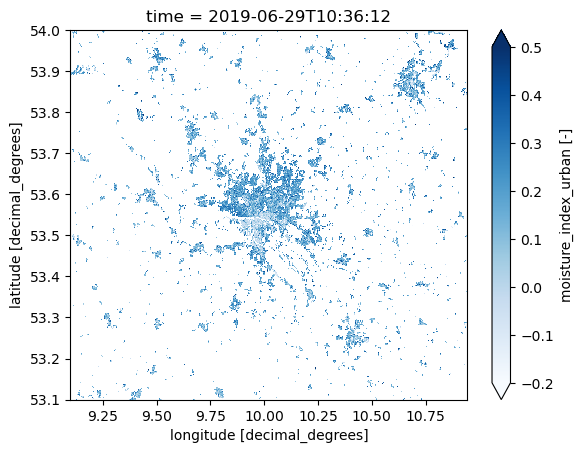

In [24]:
%%time
ds_spec_indices.moisture_index_urban.isel(time=-1).plot(cmap="Blues", vmin=-0.2, vmax=0.5)

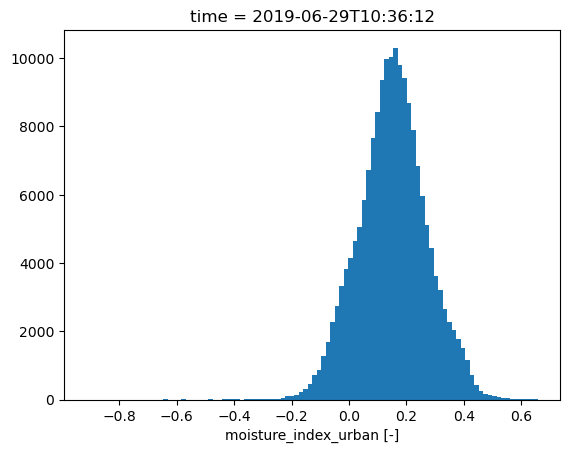

In [25]:
n, bins, ax = ds_spec_indices.moisture_index_urban.isel(time=-1).plot.hist(bins=100)

Next, we write the analysis-ready data cube containing the masked spectral indices to the s3 team storage. Also here, we employ the [xcube `.levels` format](https://xcube.readthedocs.io/en/latest/mldatasets.html#the-xcube-levels-format). This format allows for fast data visualization in the xcube viewer, enabling efficient viewing of the data at different scales.

In [26]:
%%time
team_store.write_data(
    ds_spec_indices,
    "s2l2a_hamburg_cube_spectral_indices.levels",
    replace=True
)

CPU times: user 8.64 s, sys: 1.47 s, total: 10.1 s
Wall time: 17.1 s


's2l2a_hamburg_cube_spectral_indices.levels'

And we shut down the dask cluster with the following line of code:

In [27]:
if use_cluster:
    cluster.shutdown()

-----------------
## **2.6 Start xcube viewer for visualization** <a name="xcube_viewer"></a> 

In the last step, we initiate the xcube viewer, which starts the server under the hood, needed for the data visualization and exploration. The viewer can be started via the Python API. Here, the desired data cubes are added to the viewer via the method `add_dataset()`. The viewer can be then opened within the Jupyter notebook with the method `show()`. 

In [28]:
%%time
ds_sentinel2 = team_store.open_data("s2l2a_hamburg_cube.levels")
spectral_indices = team_store.open_data("s2l2a_hamburg_cube_spectral_indices.levels")
viewer = Viewer()
viewer.add_dataset(ds_sentinel2)
viewer.add_dataset(spectral_indices)
viewer.show()

CPU times: user 174 ms, sys: 11.7 ms, total: 186 ms
Wall time: 606 ms


404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 5.33ms
no chunks found for dimension 'time' of variable 'lccs_class' in time-chunked dataset 'hub-deepesdl2-s2l2a_hamburg_cube.levels'
/home/conda/deepesdl/3d852a45ac723616737b70f11dd1ac0a9c77895b56ba468b492c4f3e7579c2cc-20240627-081530-049995-522-xcube-1.6.0/lib/python3.11/site-packages/xcube/core/tile.py:693: UserWarning: no explicit representation of timezones available for np.datetime64
  label = np.array(label).astype(coord_var.dtype)
/home/conda/deepesdl/3d852a45ac723616737b70f11dd1ac0a9c77895b56ba468b492c4f3e7579c2cc-20240627-081530-049995-522-xcube-1.6.0/lib/python3.11/site-packages/xcube/core/tile.py:693: UserWarning: no explicit representation of timezones available for np.datetime64
  label = np.array(label).astype(coord_var.dtype)
/home/conda/deepesdl/3d852a45ac723616737b70f11dd1ac0a9c77895b56ba468b492c4f3e7579c2cc-20240627-081530-049995-5

The viewer can be also opened as a web application, where the temporary url can be retrieved by the method `info()`.

In [29]:
viewer.info()

Server: https://deep.earthsystemdatalab.net/user/konstntokas/proxy/8000
Viewer: https://deep.earthsystemdatalab.net/user/konstntokas/proxy/8000/viewer/?serverUrl=https://deep.earthsystemdatalab.net/user/konstntokas/proxy/8000


-----------------
## **Clean up** 

As a final step we will clean up the team storage and delete the saved data cubes.

In [30]:
team_store.delete_data("s2l2a_hamburg_cube.levels")
team_store.delete_data("s2l2a_hamburg_cube_spectral_indices.levels")